##  S12 T01: Aprenentatge Supervisat - Regressions - Eduardo Baffi

#### Descripció
Anem a practicar i a familiaritzar-nos amb regressions

### Nivell 1

#### - Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset Airlines Delay

Airline on-time statistics and delay causes
Source: https://www.kaggle.com/giovamata/airlinedelaycauses

### Variable descriptions
(available here: http://stat-computing.org/dataexpo/2009/the-data.html)
     
    Name: Description
1.	Year:	             1987-2008
2.	Month:	             1-12
3.	DayofMonth:	         1-31
4.	DayOfWeek:	         1 (Monday) - 7 (Sunday)
5.	DepTime	actual:       departure time (local, hhmm)
6.	CRSDepTime:	         scheduled departure time (local, hhmm)
7.	ArrTime:	             actual arrival time (local, hhmm)
8.	CRSArrTime:	         scheduled arrival time (local, hhmm)
9.	UniqueCarrier:	     unique carrier code
10.	FlightNum:	         flight number
11.	TailNum	plane:        tail number
12.	ActualElapsedTime:	 in minutes
13.	CRSElapsedTime:	     in minutes
14.	AirTime:	             in minutes
15.	ArrDelay:	         arrival delay, in minutes
16.	DepDelay:	         departure delay, in minutes
17.	Origin:	             origin IATA airport code
18.	Dest:	             destination IATA airport code
19.	Distance:	         in miles
20.	TaxiIn	taxi:         in time, in minutes
21.	TaxiOut	taxi:         out time in minutes
22.	Cancelled:	         was the flight cancelled?
23.	CancellationCode:	 reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	Diverted:	         1 = yes, 0 = no
25.	CarrierDelay:	     in minutes
26.	WeatherDelay:	     in minutes
27.	NASDelay:	         in minutes
28.	SecurityDelay:	     in minutes
29.	LateAircraftDelay:	 in minutes

Source: https://aspmhelp.faa.gov/index/Types_of_Delay.html
Carrier delay is within the control of the air carrier.

Late Arrival Delay: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.

NAS Delay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Weather Delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

In [2]:
flights_df = pd.read_csv('DelayedFlights2.csv')
pd.set_option('display.max_columns', None)
flights_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check null values
flights_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [4]:
# % missing values per column 
missing_data_count = flights_df.isnull().sum()
total_rows = len(flights_df.index)
missing_percent = missing_data_count/total_rows*100
missing_percent

Unnamed: 0            0.000000
Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [5]:
flights_df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Delete rows with a low % of null values:'ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'

# There are many null values in columns 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay' (about 35% of total). 
# The dataset is big, so these columns will be dropped to avoid distortion in the regression process
# Drop 'Unnamed: 0'column

flights_new = flights_df.copy()
flights_new = flights_new.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])
flights_new = flights_new.drop(['Unnamed: 0', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 1)
flights_new.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [7]:
flights_new

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0


In [8]:
# Maintain relevant columns

filtered_columns = ['DayOfWeek', 'DepTime',
       'ArrTime', 'UniqueCarrier', 'TailNum',
       'ActualElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance']

filtered_df = flights_new[filtered_columns].sample(frac=0.05)

target_column = 'ArrDelay'
target = filtered_df[target_column]

#data = filtered_df.drop(columns=[target_column])

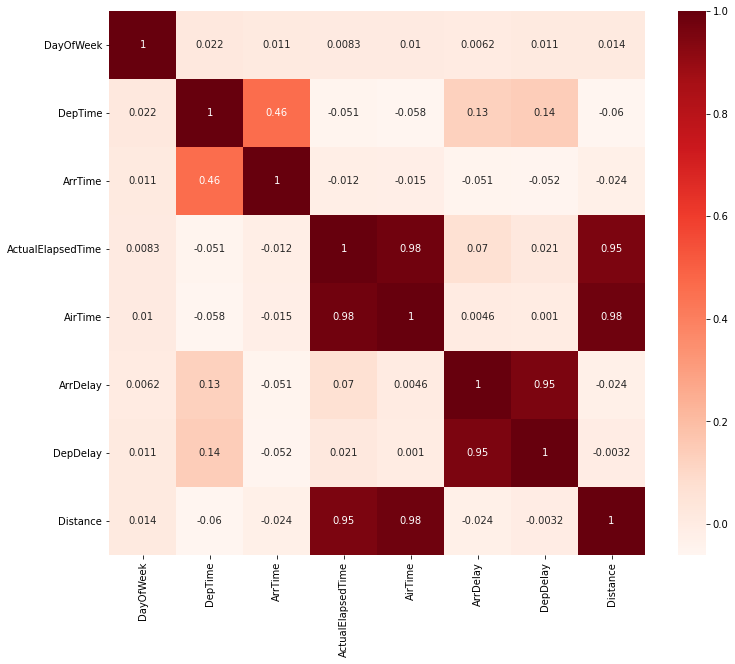

In [9]:
# Not necessarily every feature is going to have an impact on the output variable. It is necessary to do feature selection.
# Using Pearson Correlation for numerical features

import seaborn as sns

plt.figure(figsize=(12,10))
cor = filtered_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# Correlation with output variable
cor_target = abs(cor["ArrDelay"])
cor_target

DayOfWeek            0.006209
DepTime              0.128181
ArrTime              0.051418
ActualElapsedTime    0.069682
AirTime              0.004555
ArrDelay             1.000000
DepDelay             0.954131
Distance             0.023978
Name: ArrDelay, dtype: float64

In [11]:
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

DepTime     0.128181
ArrDelay    1.000000
DepDelay    0.954131
Name: ArrDelay, dtype: float64

In [12]:
# Correlation of selected features with each other

print(filtered_df[["DepTime","DepDelay"]].corr())

           DepTime  DepDelay
DepTime   1.000000  0.140148
DepDelay  0.140148  1.000000


In [13]:
filtered_df.head()

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance
707963,1,708.0,954.0,AS,N960AS,166.0,144.0,14.0,8.0,LAS,SEA,866
1627867,1,1621.0,1729.0,WN,N787SA,68.0,55.0,14.0,21.0,OAK,ONT,361
614451,7,1643.0,1646.0,YV,N47202,63.0,48.0,50.0,57.0,TVC,ORD,224
1180584,2,1627.0,1736.0,EV,N354CA,129.0,92.0,33.0,39.0,ATL,MKE,669
739322,3,2133.0,2229.0,WN,N316SW,56.0,39.0,29.0,28.0,DAL,TUL,237


In [14]:
# Just the numerical features were evaluated until now
# Now the categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(filtered_df)

encoder = OneHotEncoder(sparse=False)

data_categorical = filtered_df[categorical_columns]

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=filtered_df.index)
result.head()

UniqueCarrier_9E  UniqueCarrier_AA  UniqueCarrier_AQ  \
707963                0.0               0.0               0.0   
1627867               0.0               0.0               0.0   
614451                0.0               0.0               0.0   
1180584               0.0               0.0               0.0   
739322                0.0               0.0               0.0   

         UniqueCarrier_AS  UniqueCarrier_B6  UniqueCarrier_CO  \
707963                1.0               0.0               0.0   
1627867               0.0               0.0               0.0   
614451                0.0               0.0               0.0   
1180584               0.0               0.0               0.0   
739322                0.0               0.0               0.0   

         UniqueCarrier_DL  UniqueCarrier_EV  UniqueCarrier_F9  \
707963                0.0               0.0               0.0   
1627867               0.0               0.0               0.0   
614451                0.0               0.0               0.0   
1180584               0.0               1.0               0.0   
739322                0.0               0.0               0.0   

         UniqueCarrier_FL  UniqueCarrier_HA  UniqueCarrier_MQ  \
707963                0.0               0.0               0.0   
1627867               0.0               0.0               0.0   
614451                0.0               0.0               0.0   
1180584               0.0               0.0               0.0   
739322                0.0               0.0               0.0   

         UniqueCarrier_NW  UniqueCarrier_OH  UniqueCarrier_OO  \
707963                0.0               0.0               0.0   
1627867               0.0               0.0               0.0   
614451                0.0               0.0               0.0   
1180584               0.0               0.0               0.0   
739322                0.0               0.0               0.0   

         UniqueCarrier_UA  UniqueCarrier_US  UniqueCarrier_WN  \
707963                0.0               0.0               0.0   
1627867               0.0               0.0               1.0   
614451                0.0               0.0               0.0   
1180584               0.0               0.0               0.0   
739322                0.0               0.0               1.0   

         UniqueCarrier_XE  UniqueCarrier_YV  TailNum_80009E  TailNum_80019E  \
707963                0.0               0.0             0.0             0.0   
1627867               0.0               0.0             0.0             0.0   
614451                0.0               1.0             0.0             0.0   
1180584               0.0               0.0             0.0             0.0   
739322                0.0               0.0             0.0             0.0   

         TailNum_80059E  TailNum_80129E  TailNum_80139E  TailNum_80199E  \
707963              0.0             0.0             0.0             0.0   
1627867             0.0             0.0             0.0             0.0   
614451              0.0             0.0             0.0             0.0   
1180584             0.0             0.0             0.0             0.0   
739322              0.0             0.0             0.0             0.0   

         TailNum_80209E  TailNum_80219E  TailNum_80239E  TailNum_80249E  \
707963              0.0             0.0             0.0             0.0   
1627867             0.0             0.0             0.0             0.0   
614451              0.0             0.0             0.0             0.0   
1180584             0.0             0.0             0.0             0.0   
739322              0.0             0.0             0.0             0.0   

         TailNum_80259E  TailNum_80269E  TailNum_80279E  TailNum_80299E  \
707963              0.0             0.0             0.0             0.0   
1627867             0.0             0.0             0.0             0.0   
614451              0.0             0.0             0.0      

In [15]:
categorical_columns

['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

In [16]:
result.shape

(96418, 5783)

There are a lot of new columns when all the four categorical columns are encoded. 
Because of that, it was decided only the column 'UniqueCarrier'will be transformed. The carrier may influence the delays.

In [17]:
flights_encoded = filtered_df.copy()
flights_encoded.shape

(96418, 12)

In [18]:
# Let`s use one of the categorical feature
carrier_column = data_categorical[["UniqueCarrier"]]
carrier_encoded = encoder.fit_transform(carrier_column)
carrier_encoded[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0.]])

In [19]:
feature_names = encoder.get_feature_names(input_features=["UniqueCarrier"])
carrier_encoded = pd.DataFrame(carrier_encoded, columns=feature_names)
carrier_encoded

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96413,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
carrier_encoded.set_index(filtered_df.index, inplace=True)

In [21]:
carrier_encoded

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
707963,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1381520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142215,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
united = flights_encoded.join(carrier_encoded)

In [23]:
united

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
707963,1,708.0,954.0,AS,N960AS,166.0,144.0,14.0,8.0,LAS,SEA,866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627867,1,1621.0,1729.0,WN,N787SA,68.0,55.0,14.0,21.0,OAK,ONT,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614451,7,1643.0,1646.0,YV,N47202,63.0,48.0,50.0,57.0,TVC,ORD,224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180584,2,1627.0,1736.0,EV,N354CA,129.0,92.0,33.0,39.0,ATL,MKE,669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739322,3,2133.0,2229.0,WN,N316SW,56.0,39.0,29.0,28.0,DAL,TUL,237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421063,5,1914.0,2331.0,CO,N17344,197.0,166.0,181.0,239.0,DFW,EWR,1372,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396792,2,1943.0,2102.0,AA,N484AA,79.0,52.0,2.0,8.0,MSP,ORD,334,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1381520,1,834.0,1014.0,NW,N337NW,160.0,126.0,10.0,9.0,ATL,MSP,906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142215,1,1829.0,1939.0,9E,87109E,70.0,37.0,120.0,109.0,RHI,MSP,190,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
cor = united.corr()
cor_target = abs(cor["ArrDelay"])
cor_target

DayOfWeek            0.006209
DepTime              0.128181
ArrTime              0.051418
ActualElapsedTime    0.069682
AirTime              0.004555
ArrDelay             1.000000
DepDelay             0.954131
Distance             0.023978
UniqueCarrier_9E     0.008384
UniqueCarrier_AA     0.030073
UniqueCarrier_AQ     0.005874
UniqueCarrier_AS     0.013979
UniqueCarrier_B6     0.031260
UniqueCarrier_CO     0.008586
UniqueCarrier_DL     0.005810
UniqueCarrier_EV     0.020125
UniqueCarrier_F9     0.031011
UniqueCarrier_FL     0.008203
UniqueCarrier_HA     0.006321
UniqueCarrier_MQ     0.013302
UniqueCarrier_NW     0.000955
UniqueCarrier_OH     0.021371
UniqueCarrier_OO     0.012311
UniqueCarrier_UA     0.028920
UniqueCarrier_US     0.023431
UniqueCarrier_WN     0.102024
UniqueCarrier_XE     0.039875
UniqueCarrier_YV     0.039091
Name: ArrDelay, dtype: float64

Correlation of each company with the feature "ArrDelay" varies significantly, but none of then . 
The carrier WN, for example, has a corretaliton of around 0.10 with "ArrDelay".

After evaluating the features, only those which are highly correlated with the output variable "ArrDelay" (target) will be maintained.

Because al that, only the columns "DepTime" and "DepDelay" will be used in the regression models

The corretalion with "DepTime"is not high, but it will be maintained because the rest of the numerical features have much smaller corr. 

In [25]:
regression_columns = ["DepDelay", "DepTime"]
regression_df = united[regression_columns]
target_column = ["ArrDelay"]
target =  united[target_column] 

In [26]:
# Linear Regression
# Using just one variable and no constant (uncentered)

import statsmodels.api as sm

X = regression_df["DepDelay"]
y = target["ArrDelay"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ArrDelay   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.553e+06
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:09:32   Log-Likelihood:                     -4.1102e+05
No. Observations:               96418   AIC:                                  8.220e+05
Df Residuals:                   96417   BIC:                                  8.220e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DepDelay       1.0012      0.001   1246.027      0.000       1.000       1.003
==============================================================================
Omnibus:                    65969.630   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2280012.026
Skew:                           2.841   Prob(JB):                         0.00
Kurtosis:                      26.135   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Table:
* The coefficient 'coef' means that as the "DepDelay" variable increases by 1, the predicted value of MDEV increases by the coef. 
* R-squared near 1 means that our model explains a high percentage of variance. 
* There is a 95% confidence intervals for the "DepDelay". It means that the model predicts at a 95% percent confidence that the value of "DepDelay" is between the values bellow [0.025	0.975].

In [27]:
# Add a constant to our model

X = regression_df["DepDelay"]
y = target["ArrDelay"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions2 = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 9.793e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:09:35   Log-Likelihood:            -4.1076e+05
No. Observations:               96418   AIC:                         8.215e+05
Df Residuals:                   96416   BIC:                         8.215e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6059      0.071    -22.717      0.000      -1.744      -1.467
DepDelay       1.0158      0.001    989.572      0.000       1.014       1.018
==============================================================================
Omnibus:                    65426.452   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2246404.420
Skew:                           2.808   Prob(JB):                         0.00
Kurtosis:                      25.970   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Table:

* The coefficients are different because the constant term. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept around -1.5. We also changed the slope of the DepDelay predictor.

In [28]:
# Multiple Linear Regression
# Now let’s try fitting a regression model with more than one variable.
# We’ll be using "DepDelay" and "DepTime":

X = regression_df[["DepTime", "DepDelay"]]
y = target["ArrDelay"]

model = sm.OLS(y, X).fit()
predictions3 = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ArrDelay   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          7.809e+05
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                        0.00
Time:                        18:09:37   Log-Likelihood:                     -4.1075e+05
No. Observations:               96418   AIC:                                  8.215e+05
Df Residuals:                   96416   BIC:                                  8.215e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DepTime       -0.0010   4.49e-05    -23.275      0.000      -0.001      -0.001
DepDelay       1.0164      0.001    984.873      0.000       1.014       1.018
==============================================================================
Omnibus:                    65506.729   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2257303.748
Skew:                           2.812   Prob(JB):                         0.00
Kurtosis:                      26.027   Cond. No.                         29.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Linear Regression in SKLearn

from sklearn import linear_model

X = regression_df
y = target["ArrDelay"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions4 = lm.predict(X)
print(predictions4[0:5]) # 5 predictions for y ("ArrDelay")

[ 7.07107882 19.63353152 56.21748429 37.92909011 26.38332475]


In [30]:
lm.score(X,y) # Means R² score of our model. This value is the percentage of explained variance of the predictions.

0.9103977734390134

In [31]:
lm.coef_ # Estimated coefficients for the linear regression problem

array([ 1.01665874e+00, -7.16441251e-04])

In [32]:
lm.intercept_  # Independent term in the linear model.

-0.554950661406636

In [33]:
# Now, let`s try a liner regression with the dataset "united" with all features available before feature selection.
# Only the target "ArrDelay" and the the categorical features not encoded are excluded. 

features_df = united.copy()
features_df = features_df.drop(['ArrDelay','UniqueCarrier','TailNum','Origin','Dest'], 1)

X = features_df
y = target["ArrDelay"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions5 = lm.predict(X)
print(predictions5[0:5])

[18.25883591 12.99259295 50.18752905 45.21320427 22.20182656]


In [34]:
lm.score(X,y) 
# Higher than the regression that was made just wtih 2 features. 
# We have to pay attention because it could me overfitting.

0.9724806069399743

In [35]:
lm.coef_ # Estimated coefficients for the linear regression problem

array([-1.19122743e-02, -1.07080407e-03, -8.15869622e-04,  8.46302035e-01,
       -4.31237207e-01,  9.95714694e-01, -5.22183137e-02, -4.70329222e+00,
        6.70363615e-01,  1.13755205e+01,  2.08737577e+00, -5.12918110e+00,
       -7.02001896e+00, -3.72437821e+00, -1.58958740e+00,  3.58450256e+00,
        1.49360854e+00,  1.31392840e+01,  1.84848089e-01, -5.27596585e-01,
       -6.38654330e+00,  7.14672956e-01, -9.84836596e-01, -2.86570119e+00,
        3.67402445e+00, -3.10255133e+00, -8.90513545e-01])

In [36]:
lm.intercept_  # Independent term in the linear model.

-23.41279659172229

In [37]:
# Polynomial Regression With Scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = regression_df
y = target["ArrDelay"]

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y)

In [38]:
# Results

r_sq = model.score(X_poly, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.9106197105386578
intercept: -6.71904102009799
coefficients: [ 0.00000000e+00  1.02731043e+00  8.55268106e-03 -1.82559102e-05
 -8.38614406e-07 -3.27784081e-06]


* .score() returns c.
* The values of the weights are associated to .intercept_ and .coef_: .intercept_ represents 𝑏₀, while .coef_ references the array that contains 𝑏₁ and 𝑏₂ respectively.
* There are six regression coefficients (including the intercept). 
* Estimated regression function 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂².
* 𝑅² is very close to 1 and it might also be a sign of overfitting. It is necessary to test the modelwith new data (train). 

In [39]:
# Predicted response:
# The results are close to those received in the Linear Regression using SKLearn.

y_predit = model.predict(X_poly)
print('predicted response:', y_predit, sep='\n')

predicted response:
[  5.90575875  20.06878705  56.90349405 ...   7.37199367 109.55139696
  13.1556156 ]


In [40]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor


X = regression_df[["DepDelay"]].values
y = target["ArrDelay"].values

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [41]:
# Prediction if one aleatory value of DepDelay is chosen
y_predition = regressor.predict([[11]])
y_predition

array([8.85070038])

The result of the prediction is close to other regressions already done.

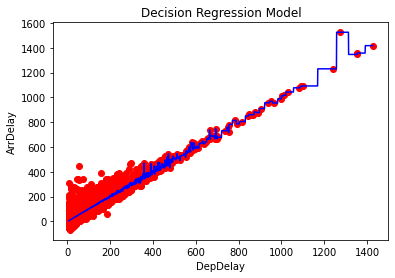

In [42]:
# Visualising the Regression results

X_grid = np.arange(min(X), max(X))
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Regression Model')
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')
plt.show()

In [43]:
neural_df = features_df[['DayOfWeek','DepTime','ArrTime','ActualElapsedTime','AirTime','DepDelay','Distance']]

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_neural = scaler.fit_transform(neural_df) 

In [45]:
# Neural Networks Using scikit-learn

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = scaled_neural
y = target["ArrDelay"].values

mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), activation='relu', solver='adam', max_iter=500)
mlp.fit(X,y)

predict_Neural = mlp.predict(X)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y,predict_Neural))
print(classification_report(y,predict_Neural))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       -54.0       0.00      0.00      0.00         1
       -51.0       0.00      0.00      0.00         1
       -49.0       0.00      0.00      0.00         1
       -48.0       0.00      0.00      0.00         1
       -45.0       0.00      0.00      0.00         2
       -43.0       0.00      0.00      0.00         4
       -41.0       0.00      0.00      0.00         1
       -40.0       0.00      0.00      0.00         1
       -39.0       0.00      0.00      0.00         3
       -38.0       0.00      0.00      0.00         3
       -37.0       0.00      0.00      0.00         2
       -36.0       0.00      0.00      0.00         6
       -35.0       0.00      0.00      0.00         3
       -34.0       0.00      0.00      0.00         8
       -33.0       0.00      0.00      0.00         5
       -32.0   

The result of the Neural Networks Regression presented a very low accuracy. It is necessary to get a deeper understanding of this model in order to undestand why the results are poor. Maybe the model is not adequate for the dataset or adjusments are necessary.

The objetive of this exercise is to create regression models. Train/test will be used in other exercises of this sprint.

### - Exercici 2
Compara’ls en base al MSE i al R2 .

In [45]:
# Linear Regression
# Using just one variable and no constant (uncentered)

from sklearn.metrics import mean_squared_error

y_true = target["ArrDelay"]
y_pred = predictions
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
295.25187086248883


From exercise 1 ('model.summary()') - R-squared: 0.940

The value can be checked above.

In [46]:
# Linear Regression with constant

y_pred = predictions2
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
293.67995538814733


From exercise 1 ('model.summary()') - R-squared: 0.906

The value can be checked above.

In [47]:
# Multiple Linear Regression

y_pred = predictions3
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
293.6022538868948


From exercise 1 ('model.summary()') - R-squared: 0.940

The value can be checked above.

In [48]:
# Linear Regression in SKLearn

y_pred = predictions4
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
293.5774502038067


From exercise 1 ('.score(X,y)') - R-squared: 0.9060875142924492

The value can be checked above.

In [49]:
# Linear Regression in SKLearn - all features dataset "united"

y_pred = predictions5
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
90.16598756304083


From exercise 1 ('.score(X,y)') - R-squared: 0.9717627292986957

The value can be checked above.

In [50]:
# Polynomial Regression With scikit-learn

y_pred = y_predit
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

MSE:
292.8502838116314


From exercise 1 ('r_sq = model.score(X_poly, y))') - R-squared: 0.9063594672793754

The value can be checked above.

In [55]:
# Decision Tree Regression

from sklearn.metrics import r2_score

y_pred = regressor.predict(X)
print('MSE:', mean_squared_error(y_true, y_pred), sep='\n')

print('R-squared:', r2_score(y_true, y_pred), sep='\n')

MSE:
290.1537859477932
R-squared:
0.9114427036273609


MSE results goes from ~89 to ~297.
* Lowest MSE: 89.35982432759549 (Linear Regression (uncentered) & Linear Regression in SKLearn - all features dataset "united")
* Highest MSE: 297.1959759767756 (Linear Regression in SKLearn)

The models with the lowest MSE have better results if compared to the other.
MSE gives an absolute number on how much the predicted results deviate from the actual number.

All the regressions have R-squared bigger than 0.90.
* Highest R-squared: 0.9717627292986957 (# Linear Regression in SKLearn - all features dataset "united")
* Lowest R-squared: 0.906 (Linear Regression with constant)

It is important to remember that a high R-squared may indicate over overfitting.

It is necessary to test the model with new data and observe his behavior.

### - Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

#### Linear Regression
(statsmodels.regression.linear_model.OLS.fit)

methodstr, optional: Can be “pinv”, “qr”. “pinv” uses the Moore-Penrose pseudoinverse to solve the least squares problem. “qr” uses the QR factorization.

In [56]:
# Linear Regression
# Using just one variable and no constant (uncentered)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X = regression_df["DepDelay"].values
y = target["ArrDelay"].values

#scaler = StandardScaler()
#scaler.fit(X.reshape(-1, 1))

#X = scaler.transform(X.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)


In [57]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.413995216545324
Mean Squared Error: 289.2103352081481
Root Mean Squared Error: 17.006185204452763
R2: 0.9063829617098966


In [58]:
model = sm.OLS(y_train, X_train).fit(method='qr')
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.413995216545324
Mean Squared Error: 289.2103352081481
Root Mean Squared Error: 17.006185204452763
R2: 0.9063829617098966


In [59]:
model = sm.OLS(y_train, X_train).fit(cov_type='HC1',use_t=None)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.413995216545324
Mean Squared Error: 289.2103352081481
Root Mean Squared Error: 17.006185204452763
R2: 0.9063829617098966


#### Linear Regression with constant

In [60]:
# Linear Regression with constant
X = regression_df["DepDelay"].values
y = target["ArrDelay"].values
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.195834557681975
Mean Squared Error: 287.73553755880897
Root Mean Squared Error: 16.96276915950957
R2: 0.9068603519383923


In [61]:
model = sm.OLS(y_train, X_train).fit(method="pinv")
y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.195834557681975
Mean Squared Error: 287.73553755880897
Root Mean Squared Error: 16.96276915950957
R2: 0.9068603519383923


In [62]:
model = sm.OLS(y_train, X_train).fit(cov_type='HC0',use_t=True)
y_pred = model.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.195834557681975
Mean Squared Error: 287.73553755880897
Root Mean Squared Error: 16.96276915950957
R2: 0.9068603519383923


#### Linear Regression in SKLearn
##### Parameters (sklearn.linear_model.LinearRegression)
fit_intercept: bool, default=True: Whether tocalculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

normalize: bool, default=False: This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

positive: bool, default=False: When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [63]:
# Linear Regression in SKLearn

X = regression_df
y = target["ArrDelay"]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.188021718858913
Mean Squared Error: 287.5556562762819
Root Mean Squared Error: 16.95746609244087
R2: 0.9069185792935865


In [64]:
lm = linear_model.LinearRegression(fit_intercept=False)
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 42.15336093032811
Mean Squared Error: 2062.7131684299925
Root Mean Squared Error: 45.417102157997626
R2: 0.33230222380735086


In [65]:
lm = linear_model.LinearRegression(positive=True)
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.195834557682169
Mean Squared Error: 287.7355375588096
Root Mean Squared Error: 16.962769159509588
R2: 0.9068603519383921


In [66]:
lm = linear_model.LinearRegression(normalize=True)
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.188021718858911
Mean Squared Error: 287.5556562762819
Root Mean Squared Error: 16.95746609244087
R2: 0.9069185792935865


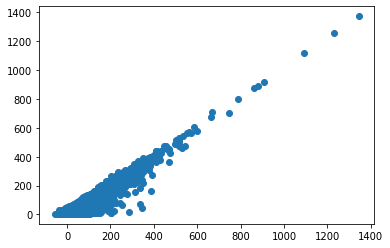

In [67]:
plt.scatter(y_test, y_pred)

#### Polynomial Regression With Scikit-learn

In [68]:
# Polynomial Regression With Scikit-learn

X = regression_df.values
y = target["ArrDelay"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 11.194294004848171
Mean Squared Error: 287.09020270281644
Root Mean Squared Error: 16.94373638554426
R2: 0.9070692460565085


In [69]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 11.192822308772898
Mean Squared Error: 288.70079699355944
Root Mean Squared Error: 16.99119763270263
R2: 0.9065478986182235


In [70]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 11.29179589229786
Mean Squared Error: 295.4602131022151
Root Mean Squared Error: 17.18895613765464
R2: 0.9043598837389927


In [71]:
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 11.594648761643903
Mean Squared Error: 350.25271336448117
Root Mean Squared Error: 18.715039763903285
R2: 0.8866236171862386


In [72]:
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 12.407898402727284
Mean Squared Error: 1015.1362503414921
Root Mean Squared Error: 31.861202901671682
R2: 0.6714016145049093


#### Decision Tree Regression

In [73]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

X = regression_df[["DepDelay"]].values
y = target["ArrDelay"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

Mean Absolute Error: 11.271803032099465
Mean Squared Error: 293.7709789521236
Root Mean Squared Error: 17.13974850901038
R2: 0.9049066868053363


In [74]:
regressor = DecisionTreeRegressor(criterion='mae',random_state=42)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

Mean Absolute Error: 11.018149761460277
Mean Squared Error: 299.6872018253474
Root Mean Squared Error: 17.311476015214513
R2: 0.9029916125641037


In [75]:
regressor = DecisionTreeRegressor(splitter='random', max_depth=25, min_samples_split=5, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features='auto', random_state=42, 
                                  min_impurity_split=None, ccp_alpha=0.2)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

Mean Absolute Error: 11.35057001376685
Mean Squared Error: 295.120590284125
Root Mean Squared Error: 17.179074197526624
R2: 0.904469819237468


In [76]:
regressor = DecisionTreeRegressor(splitter='random', max_depth=2, random_state=42)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

Mean Absolute Error: 32.04990501225486
Mean Squared Error: 1895.4822914212486
Root Mean Squared Error: 43.53713692264626
R2: 0.3864346579229836


#### Neural Networks Using scikit-learn

In [75]:
# Neural Networks

X = scaled_neural
y = target["ArrDelay"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

predict_Neural = mlp.predict(X_test)

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_Neural))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_Neural))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_Neural)))
print('R2:', metrics.r2_score(y_test, predict_Neural))

Mean Absolute Error: 7.744036506948766
Mean Squared Error: 161.6409458618544
Root Mean Squared Error: 12.713809258513137
R2: 0.9483286157504747


In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), solver='adam', max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

predict_Neural = mlp.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_Neural))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_Neural))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_Neural)))
print('R2:', metrics.r2_score(y_test, predict_Neural))

Mean Absolute Error: 7.774113254511512
Mean Squared Error: 289.2991080688654
Root Mean Squared Error: 17.00879502107264
R2: 0.9075204287108853


In [78]:
mlp = MLPClassifier(solver='lbfgs', learning_rate='adaptive', max_iter=100, random_state=42, early_stopping=True)
mlp.fit(X_train, y_train)

predict_Neural = mlp.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_Neural))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predict_Neural))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_Neural)))
print('R2:', metrics.r2_score(y_test, predict_Neural))

Mean Absolute Error: 9.442888750604991
Mean Squared Error: 446.88442923321577
Root Mean Squared Error: 21.139641180332646
R2: 0.8571454965515111


### - Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

#### Performance traint/test

Along the exercise 3, different regression models where evaluated using train/test. Some parameters where changed for each model and the performance of each one is shown in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and R-squared (R2).

All the best results of each of the parameters were obtained in the first simulation of Neural Networks. However, the processing time is much longer in Neural Networks regressions.

All regression model allow results of R2 above 90% depending on the parameters used. 

#### Cross-Validation

In [77]:
# Linear Regression in SKLearn
# k-Fold Cross-Validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

X = regression_df.values
y = target["ArrDelay"].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.910 (0.007)


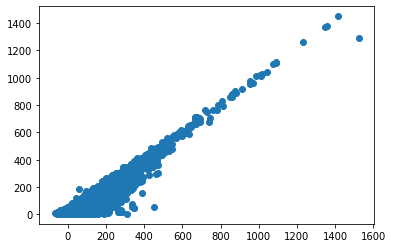

In [78]:
predictions = cross_val_predict(model, X, y, cv=cv)
plt.scatter(y, predictions)

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('R2:', metrics.r2_score(y, predictions))

Mean Absolute Error: 11.208166259634968
Mean Squared Error: 293.6041230344302
Root Mean Squared Error: 17.134880304059035
R2: 0.9103896326740776


In [83]:
# Repeated k-Fold Cross-Validation

from sklearn.model_selection import RepeatedKFold

X = regression_df.values
y = target["ArrDelay"].values

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('R2:', metrics.r2_score(y, predictions))

Accuracy: 0.910 (0.008)
Mean Absolute Error: 11.208166259634968
Mean Squared Error: 293.6041230344302
Root Mean Squared Error: 17.134880304059035
R2: 0.9103896326740776


In [84]:
# Polynomial Regression With Scikit-learn
# k-Fold Cross-Validation

cv = KFold(n_splits=10, random_state=42, shuffle=True)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y)

scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

predictions = cross_val_predict(model, X_poly, y, cv=cv)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('R2:', metrics.r2_score(y, predictions))

Accuracy: 0.910 (0.007)
Mean Absolute Error: 11.298284508553195
Mean Squared Error: 311.1087567542154
Root Mean Squared Error: 17.63827533389292
R2: 0.9050470760324199


In [85]:
# Decision Tree Regression
# k-Fold Cross-Validation

X = regression_df[["DepDelay"]].values
y = target["ArrDelay"].values

cv = KFold(n_splits=10, random_state=42, shuffle=True)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

scores = cross_val_score(regressor, X, y, cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

predictions = cross_val_predict(regressor, X_poly, y, cv=cv)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))
print('R2:', metrics.r2_score(y, predictions))

Accuracy: 0.909 (0.007)
Mean Absolute Error: 13.851072960233761
Mean Squared Error: 435.74472584476155
Root Mean Squared Error: 20.87449941542938
R2: 0.8670071641374618


In [ ]:
# Neural Networks
# k-Fold Cross-Validation

#X = scaled_neural
#y = target["ArrDelay"].values

#cv = KFold(n_splits=10, random_state=42, shuffle=True)

#mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), solver='adam', max_iter=100, random_state=42, early_stopping=True)
#mlp.fit(X, y)

#scores = cross_val_score(mlp, X, y, cv=cv, n_jobs=-1)
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

#predictions = cross_val_predict(mlp, X, y, cv=cv)

#print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
#print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#print('R2:', metrics.r2_score(y, predictions))

### Nivell 2

#### - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Feature selection and feature engineering were developed in exercise 1, just before starting the regressions. 

Null values were removed and some columns with a high number of null values were removed.

It was used the Filter Method to filter and take only the subset of the relevant features. 

The filtering was done using correlation matrix based on Pearson correlation.
After evaluating the features, only those which are highly correlated with the output variable "ArrDelay" (target) were maintained. Because of that, only the numerical columns "DepTime" and "DepDelay" were used in most of the regression models. The corretalion with "DepTime" is not high, but it was be maintained because the rest of the numerical features have much smaller corr.

Because of that, the predictions were made after feature selection to improve the results.

In [86]:
united.head()

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
707963,1,708.0,954.0,AS,N960AS,166.0,144.0,14.0,8.0,LAS,SEA,866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627867,1,1621.0,1729.0,WN,N787SA,68.0,55.0,14.0,21.0,OAK,ONT,361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
614451,7,1643.0,1646.0,YV,N47202,63.0,48.0,50.0,57.0,TVC,ORD,224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1180584,2,1627.0,1736.0,EV,N354CA,129.0,92.0,33.0,39.0,ATL,MKE,669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739322,3,2133.0,2229.0,WN,N316SW,56.0,39.0,29.0,28.0,DAL,TUL,237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
united.columns

Index(['DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'TailNum',
       'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'UniqueCarrier_9E', 'UniqueCarrier_AA',
       'UniqueCarrier_AQ', 'UniqueCarrier_AS', 'UniqueCarrier_B6',
       'UniqueCarrier_CO', 'UniqueCarrier_DL', 'UniqueCarrier_EV',
       'UniqueCarrier_F9', 'UniqueCarrier_FL', 'UniqueCarrier_HA',
       'UniqueCarrier_MQ', 'UniqueCarrier_NW', 'UniqueCarrier_OH',
       'UniqueCarrier_OO', 'UniqueCarrier_UA', 'UniqueCarrier_US',
       'UniqueCarrier_WN', 'UniqueCarrier_XE', 'UniqueCarrier_YV'],
      dtype='object')

####  Wrapper Method

In order to check the results of the Filter Method, it will be compared to the Wrapper Method to the same data set.
The objective is to identify the relevants columns (features) identified in both methods and check the results of regressions and predictions after feature engineering.

In [100]:
# Wrapper Method:

X = united[['DayOfWeek', 'DepTime', 'ArrTime','ActualElapsedTime', 
       'AirTime', 'DepDelay', 'Distance', 'UniqueCarrier_9E', 'UniqueCarrier_AA',
       'UniqueCarrier_AQ', 'UniqueCarrier_AS', 'UniqueCarrier_B6',
       'UniqueCarrier_CO', 'UniqueCarrier_DL', 'UniqueCarrier_EV',
       'UniqueCarrier_F9', 'UniqueCarrier_FL', 'UniqueCarrier_HA',
       'UniqueCarrier_MQ', 'UniqueCarrier_NW', 'UniqueCarrier_OH',
       'UniqueCarrier_OO', 'UniqueCarrier_UA', 'UniqueCarrier_US',
       'UniqueCarrier_WN', 'UniqueCarrier_XE', 'UniqueCarrier_YV']]
y = target["ArrDelay"]

X_1 = sm.add_constant(X) # Adding constant column of ones, mandatory for sm.OLS model

model = sm.OLS(y,X_1).fit()
model.pvalues

const                 0.000000e+00
DayOfWeek             4.370525e-01
DepTime               7.832395e-43
ArrTime               8.748120e-38
ActualElapsedTime     0.000000e+00
AirTime               0.000000e+00
DepDelay              0.000000e+00
Distance              0.000000e+00
UniqueCarrier_9E     7.253790e-183
UniqueCarrier_AA      8.505666e-04
UniqueCarrier_AQ      1.024988e-09
UniqueCarrier_AS      1.323715e-05
UniqueCarrier_B6     7.420443e-217
UniqueCarrier_CO      0.000000e+00
UniqueCarrier_DL     8.107197e-218
UniqueCarrier_EV      7.584792e-58
UniqueCarrier_F9      5.004439e-21
UniqueCarrier_FL      3.337484e-02
UniqueCarrier_HA     4.317312e-146
UniqueCarrier_MQ      9.362129e-11
UniqueCarrier_NW      1.007557e-21
UniqueCarrier_OH     3.393647e-308
UniqueCarrier_OO      6.235952e-03
UniqueCarrier_UA      1.268545e-48
UniqueCarrier_US     1.884798e-137
UniqueCarrier_WN     2.007408e-108
UniqueCarrier_XE     3.055458e-159
UniqueCarrier_YV      1.106425e-27
dtype: float64

In [101]:
#Backward Elimination

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(f"Final set of variables: {selected_features_BE}")

Final set of variables: ['DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'UniqueCarrier_9E', 'UniqueCarrier_AA', 'UniqueCarrier_AQ', 'UniqueCarrier_AS', 'UniqueCarrier_B6', 'UniqueCarrier_CO', 'UniqueCarrier_DL', 'UniqueCarrier_EV', 'UniqueCarrier_F9', 'UniqueCarrier_FL', 'UniqueCarrier_HA', 'UniqueCarrier_MQ', 'UniqueCarrier_NW', 'UniqueCarrier_OH', 'UniqueCarrier_OO', 'UniqueCarrier_UA', 'UniqueCarrier_US', 'UniqueCarrier_WN', 'UniqueCarrier_XE', 'UniqueCarrier_YV']


In [102]:
# Linear Regression

X = united[selected_features_BE]
y = target["ArrDelay"]

#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 6.890466040036186
Mean Squared Error: 89.16282416140018
Root Mean Squared Error: 9.442606851998033
R2: 0.9711381008650192


In [104]:
# Polynomial Regression 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
model = pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)

y_predit = model.predict(X_test_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predit))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predit))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predit)))
print('R2:', metrics.r2_score(y_test, y_predit))

Mean Absolute Error: 6.3172177812069155
Mean Squared Error: 73.7841669670325
Root Mean Squared Error: 8.589771066043175
R2: 0.9761161537357069


In [105]:
# Decision Tree Regression

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

Mean Absolute Error: 10.00539307197677
Mean Squared Error: 205.10647860056696
Root Mean Squared Error: 14.32153897458534
R2: 0.9336072791213424


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = regression_df[["DepDelay"]].values
y = target["ArrDelay"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_predition = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predition))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predition))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predition)))
print('R2:', metrics.r2_score(y_test, y_predition))

On initial analysis, the results using the Wrapper Method better than using Feature Method, i.e, the predictions were improved. The error are smaller and R2 is bigger. 

### Nivell 3

#### - Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [ ]:
# Complete Data set after cleaing null values
united.head(1)

In [ ]:
united.resume()

In [ ]:
new_df = united.copy()
new_df = new_df.drop_duplicates(inplace=True)

In [ ]:
new_df.info()

In [ ]:
# 'DepDelay'is the feature with the highest correlation with 'ArrDelay' and it cannot be included in the new predictions.
# Based on the feature engynering already developed befor, the following the features will be used in the predictions:
new_regression_columns = ["DepTime"]
data = new_df[new_regression_columns]
target_column = ["ArrDelay"]
target = united[target_column] 

In [ ]:
# Linear Regression in SKLearn

X = data
y = target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))